In [1]:
import pandas as pd


In [8]:
rt=pd.read_csv('Retail_Data_Transactions.csv')

In [9]:
rt

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [10]:
rr=pd.read_csv('Retail_Data_Response.csv')

In [11]:
rr

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [12]:
df=rt.merge(rr,on='customer_id',how='left')

In [13]:
df


,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [14]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [15]:
df.shape

(125000, 4)

In [16]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [17]:
df.head(3)

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0


In [18]:
df.describe()


,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [19]:
df.isnull()

,customer_id,trans_date,tran_amount,response
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
124995,False,False,False,False
124996,False,False,False,False
124997,False,False,False,False
124998,False,False,False,False


In [20]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [21]:
df=df.dropna()

In [22]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [23]:
df['trans_date']=pd.to_datetime(df['trans_date'])

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_17068\2547581274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_17068\2547581274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=pd.to_datetime(df['trans_date'])


In [24]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [25]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response              float64
dtype: object

In [26]:
set(df['response'])

{0.0, 1.0}

In [41]:
from scipy import stats
import numpy as np

z_scores= np.abs(stats.zscore(df['tran_amount']))
threshold= 3

outliers=z_scores>threshold
print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: tran_amount, Length: 124969, dtype: bool]


In [44]:
from scipy import stats
import numpy as np

z_scores= np.abs(stats.zscore(df['response']))
threshold= 3

outliers=z_scores>threshold
print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: response, Length: 124969, dtype: bool]


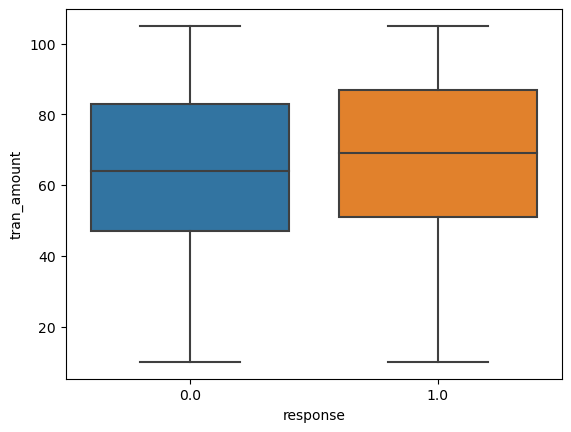

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'],y=df['tran_amount'])
plt.show()

In [52]:
plt.show()

In [56]:
df['month']=df['trans_date'].dt.month


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_17068\1641360699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


In [57]:
df['date']=df['trans_date'].dt.date

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_17068\1385304246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['trans_date'].dt.date


In [58]:
df


,customer_id,trans_date,tran_amount,response,month,date
0,CS5295,2013-02-11,35,1.0,2,2013-02-11
1,CS4768,2015-03-15,39,1.0,3,2015-03-15
2,CS2122,2013-02-26,52,0.0,2,2013-02-26
3,CS1217,2011-11-16,99,0.0,11,2011-11-16
4,CS1850,2013-11-20,78,0.0,11,2013-11-20
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,6,2011-06-26
124996,CS7232,2014-08-19,38,0.0,8,2014-08-19
124997,CS8731,2014-11-28,42,0.0,11,2014-11-28
124998,CS8133,2013-12-14,13,0.0,12,2013-12-14


In [64]:
monthly_Sales=df.groupby('month')['tran_amount'].sum()
monthly_Sales=monthly_Sales.sort_values(ascending=False).reset_index().head(5)

In [66]:
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795


In [67]:
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']


In [68]:
customer_counts


,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [72]:

top_5=customer_counts.sort_values(by='count',ascending=False).head(5)
top_5

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


In [76]:
customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()


In [77]:
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [79]:
top5_sales=customer_sales.sort_values(by='tran_amount',ascending=False).tail(5)

In [80]:
top5_sales


,customer_id,tran_amount
6724,CS8841,181
5962,CS8077,164
6119,CS8234,157
6443,CS8559,157
5220,CS7333,149


<Axes: xlabel='customer_id', ylabel='tran_amount'>

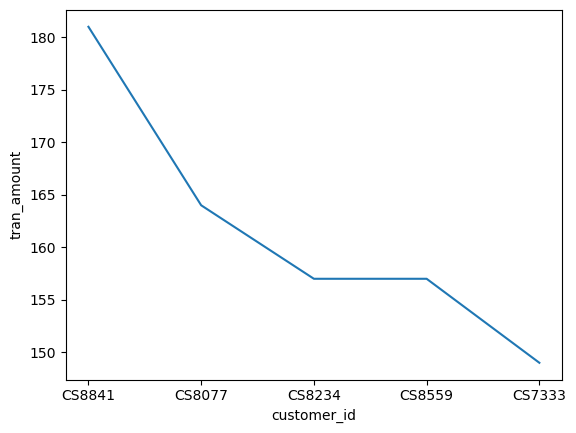

In [82]:
sns.lineplot(x='customer_id',y='tran_amount',data=top5_sales)


In [84]:
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_17068\2301036940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


In [85]:
df

,customer_id,trans_date,tran_amount,response,month,date,month_year
0,CS5295,2013-02-11,35,1.0,2,2013-02-11,2013-02
1,CS4768,2015-03-15,39,1.0,3,2015-03-15,2015-03
2,CS2122,2013-02-26,52,0.0,2,2013-02-26,2013-02
3,CS1217,2011-11-16,99,0.0,11,2011-11-16,2011-11
4,CS1850,2013-11-20,78,0.0,11,2013-11-20,2013-11
...,...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,6,2011-06-26,2011-06
124996,CS7232,2014-08-19,38,0.0,8,2014-08-19,2014-08
124997,CS8731,2014-11-28,42,0.0,11,2014-11-28,2014-11
124998,CS8133,2013-12-14,13,0.0,12,2013-12-14,2013-12


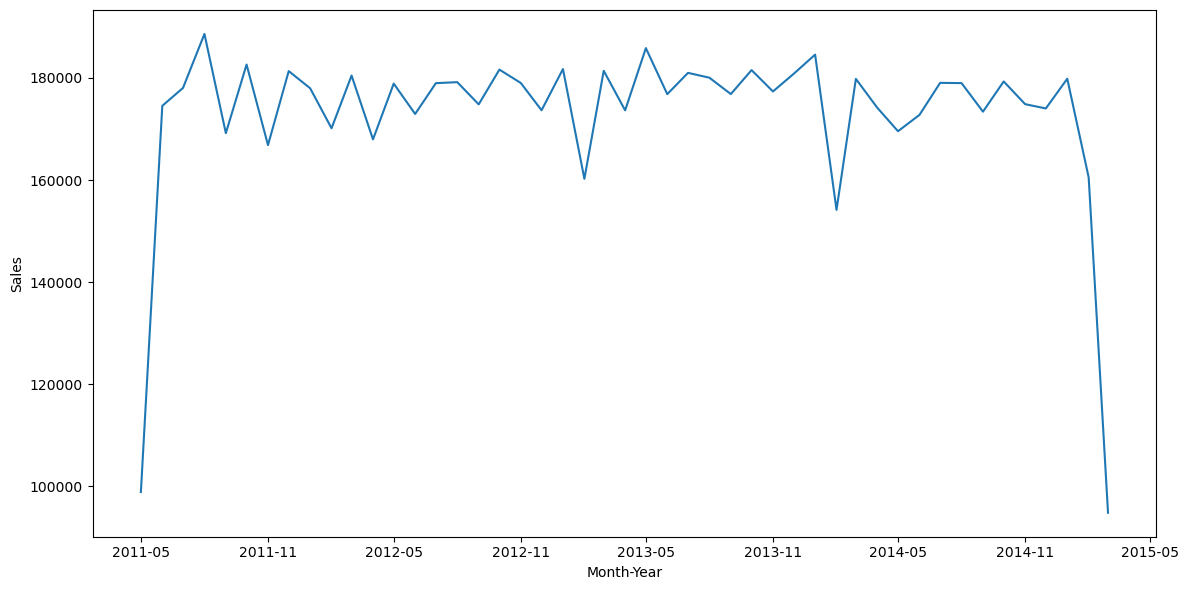

In [89]:
monthly_sales=df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index=monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [93]:
recency=df.groupby('customer_id')['trans_date'].max()
frequency=df.groupby('customer_id')['trans_date'].count()
monetary=df.groupby('customer_id')['tran_amount'].sum()

rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})

In [94]:
rfm


,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [95]:
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif(2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
    
rfm['Segment']=rfm.apply(segment_customer,axis=1)

In [96]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


<Axes: xlabel='response'>

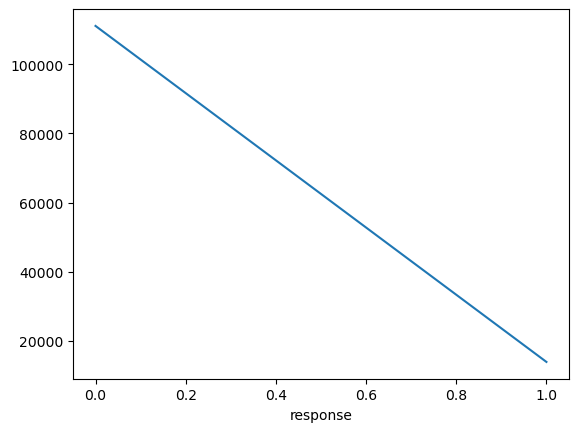

In [98]:
churn_counts=df['response'].value_counts()
churn_counts.plot(kind='line')

<Axes: xlabel='month_year'>

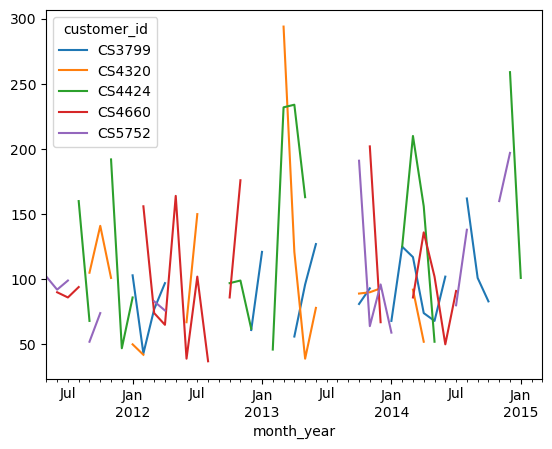

In [101]:
top_5=monetory.sort_values(ascending=False).head(5).index
top_cust_df=df[df['customer_id'].isin(top_5)]

top_cust_sales=top_cust_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_cust_sales.plot(kind='line')

In [102]:
df.to_csv('MainData.csv')

In [103]:
rfm.to_csv('AddAnlys.csv')